In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

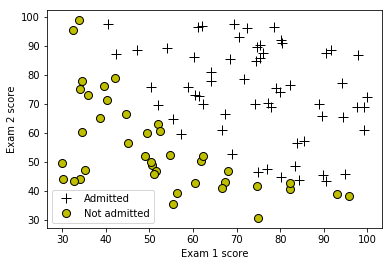

In [2]:
# Plotting Data

def plotData(x, y):
    pos = y == 1
    neg = y == 0
    plt.plot(x[pos, 0], x[pos, 1], 'k+', lw = 2, ms = 10)
    plt.plot(x[neg, 0], x[neg, 1], 'ko', mfc = 'y', ms = 8)

data = np.loadtxt("ex2data1.txt", delimiter = ',')
X_orig, y_orig = data[:, :2], data[:, 2]

plotData(X_orig, y_orig)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

In [3]:
# Compute Cost

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    
    return g

def costFunction(theta, x , y):
    m = y.size
    h = sigmoid(np.dot(x, theta))
    J = (-np.dot(y.T, np.log(h)) - np.dot((1 - y).T, np.log(1 - h)))/ m;
    grad = np.dot(x.T, h - y) / m
    
    return J, grad

m, n = X_orig.shape
X = np.concatenate([np.ones((m, 1)), X_orig], axis = 1)
y = y_orig.reshape((m, 1))
initial_theta = np.zeros((n + 1,1))

cost, grad = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): %f\n' %cost)
print('Gradient at initial theta (zeros): \n')
print(grad)

Cost at initial theta (zeros): 0.693147

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [4]:
# Optimizing 
# from https://github.com/TingNie/Coursera-ML-using-matlab-python/blob/master/logic_regression.ipynb

params = np.zeros((X.shape[1],1)).ravel()
args = (X,y)

def f(params,*args):
    X_train,y_train = args
    m,n = X_train.shape
    J = 0
    theta = params.reshape((n,1))
    h = sigmoid(np.dot(X, theta))
    J = -1*np.sum(y_train*np.log(h) + (1-y_train)*np.log((1-h))) / m
    
    return J

def gradf(params,*args):
    X_train,y_train = args
    m,n = X_train.shape
    theta = params.reshape(-1,1)
    h = sigmoid(np.dot(X, theta))
    grad = np.zeros((X_train.shape[1],1))
    grad = X_train.T.dot((h-y_train)) / m
    g = grad.ravel()
    return g

theta = optimize.fmin_cg(f, x0 = params, fprime = gradf, args = args, maxiter = 400)
print(theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 45
         Function evaluations: 107
         Gradient evaluations: 107
[-25.15895436   0.20621273   0.2014523 ]


C:\Users\BinWe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\BinWe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


Text(0, 0.5, 'Exam 2 score')

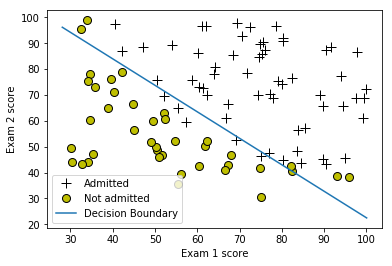

In [5]:
# Plot Boundary 

def plotDecisionBoundary(theta, x, y):
    plot_x = np.arange(np.min(x[:, 1]) - 2, np.max(x[:, 2]) + 2)
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
    plt.plot(plot_x, plot_y)
    
plotData(X_orig, y_orig)
plotDecisionBoundary(theta, X, y)
plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

In [6]:
# Predict and Accuracies

def predict(theta, x):
    p = np.where(sigmoid(np.dot(x, theta))  >= 0.5, 1.0, 0)
    return p

prob = sigmoid(np.dot([1, 45, 85], theta));
print('For a student with scores 45 and 85, we predict an admission probability of %f\n' %prob)

p = predict(theta, X)
print('Train Accuracy: %f\n' %np.mean(p == y.ravel()))

For a student with scores 45 and 85, we predict an admission probability of 0.776271

Train Accuracy: 0.890000

